In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\Courses\Data-Science_Tech\INeuron_Courses\MACHING_LEARNING_LIVE-CLASS\PROJECT\ML_CODE\ML_Live_Class\data\gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

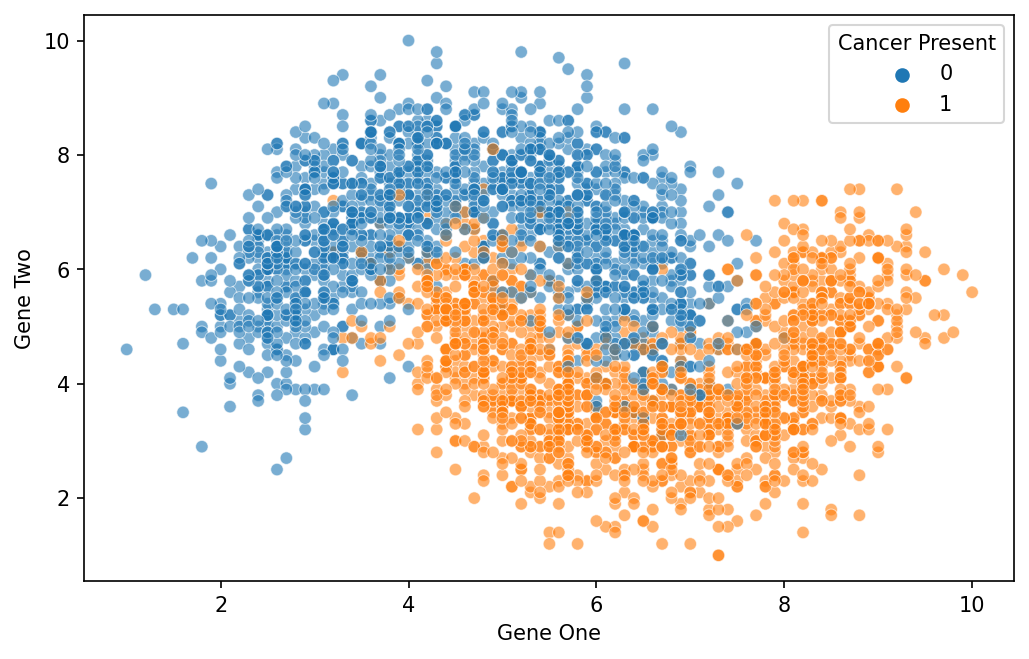

In [8]:
# Visualizing
plt.figure(figsize = (8,5),dpi = 150)
sns.scatterplot(data = df,x='Gene One', y = 'Gene Two',hue= 'Cancer Present',alpha= 0.6)

(4.0, 8.0)

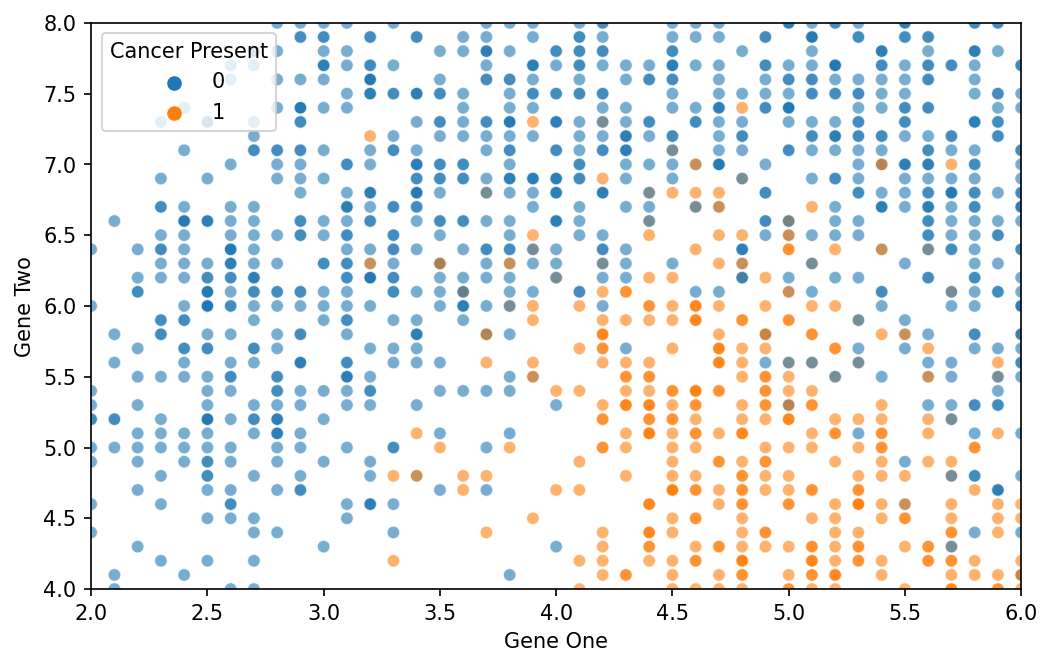

In [10]:
# Visualizing specific portion in the scatter by using xlimits and ylimits

plt.figure(figsize = (8,5),dpi = 150)
sns.scatterplot(data = df,x='Gene One', y = 'Gene Two',hue= 'Cancer Present',alpha= 0.6)
plt.xlim(2,6)
plt.ylim(4,8)

(4.0, 8.0)

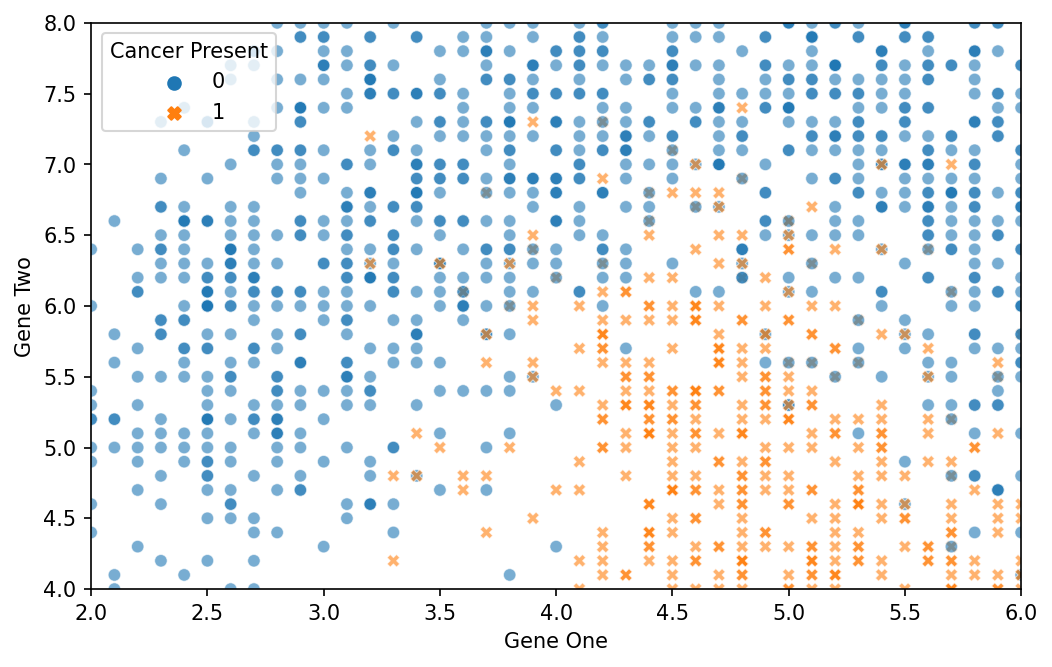

In [11]:
# Changing Style of one point

plt.figure(figsize = (8,5),dpi = 150)
sns.scatterplot(data = df,x='Gene One', y = 'Gene Two',style = 'Cancer Present',hue= 'Cancer Present',alpha= 0.6)
plt.xlim(2,6)
plt.ylim(4,8)

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

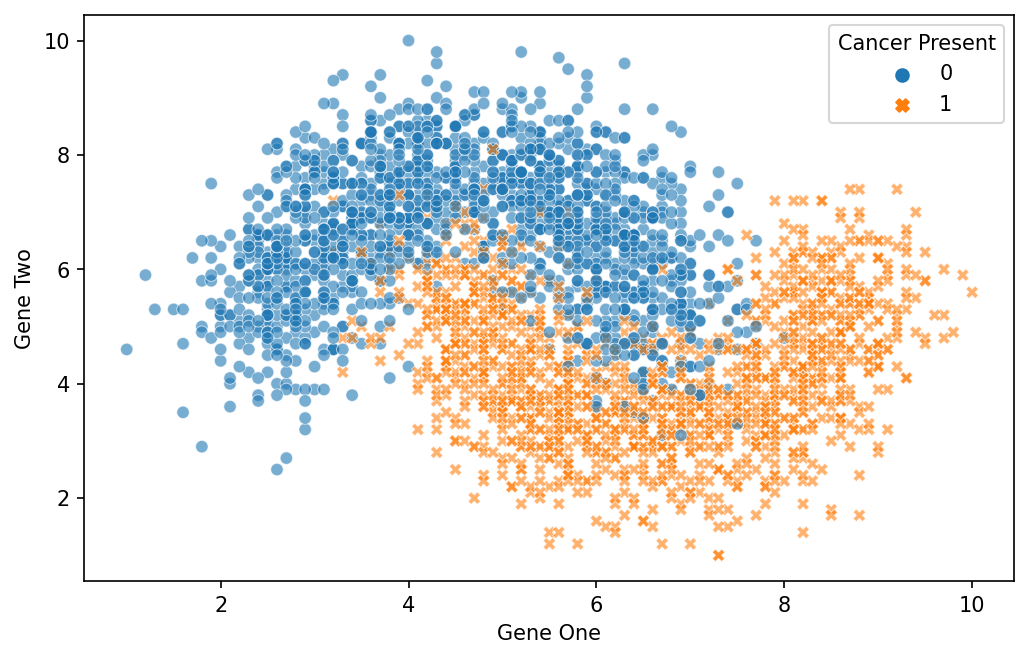

In [12]:
plt.figure(figsize = (8,5),dpi = 150)
sns.scatterplot(data = df,x='Gene One', y = 'Gene Two',style = 'Cancer Present',hue= 'Cancer Present',alpha= 0.6)

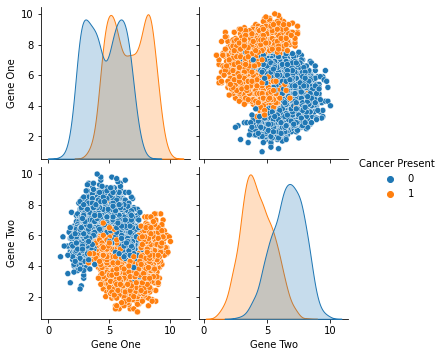

In [13]:
sns.pairplot(df,hue = 'Cancer Present')

In [14]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

In [16]:
X = df.drop('Cancer Present',axis= 1)
y = df['Cancer Present']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state=0,shuffle= True)


In [18]:
# Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
print(X_train.shape,'\n',X_test.shape)

(2550, 2) 
 (450, 2)


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn_model = KNeighborsClassifier(n_neighbors = 1)

In [24]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_pred = knn_model.predict(X_test_scaled)

In [35]:
# Generating Metrics

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [27]:
confusion_matrix(y_test,y_pred)

array([[203,  18],
       [ 26, 203]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       221
           1       0.92      0.89      0.90       229

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



In [34]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

### Choosing value of K in KNN

In [40]:
# Elbow Method
test_error_rates = []

for k in range(1,29):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train)

    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1-accuracy_score(y_test,y_pred_test)

    test_error_rates.append(test_error)

test_error_rates


[0.09777777777777774,
 0.10666666666666669,
 0.08666666666666667,
 0.0888888888888889,
 0.0822222222222222,
 0.07999999999999996,
 0.0822222222222222,
 0.0822222222222222,
 0.07999999999999996,
 0.08444444444444443,
 0.07999999999999996,
 0.07999999999999996,
 0.06888888888888889,
 0.07111111111111112,
 0.06888888888888889,
 0.06666666666666665,
 0.07111111111111112,
 0.06888888888888889,
 0.06444444444444442,
 0.06444444444444442,
 0.06444444444444442,
 0.06444444444444442,
 0.06666666666666665,
 0.06444444444444442,
 0.07333333333333336,
 0.06666666666666665,
 0.07111111111111112,
 0.06888888888888889]

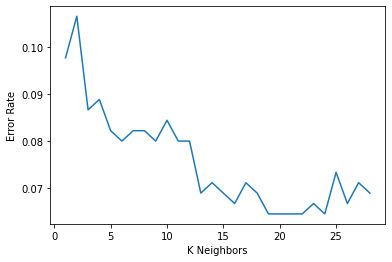

In [41]:
plt.plot(range(1,29),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')
plt.show()

In [43]:
knn_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [44]:
# Using pipeline to do GridSearchCV()

operations = [('scaler',scaler),('knn',knn_model)]

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
pipe = Pipeline(operations)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
k_values = list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [58]:
param_grid = {'knn__n_neighbors':k_values,'knn__metric':['euclidean']}

In [59]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring = 'accuracy')

In [60]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=28))]),
             param_grid={'knn__metric': ['euclidean'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [62]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=18))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(metric='euclidean', n_neighbors=18),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'euclidean',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 18,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [63]:
full_pred = full_cv_classifier.predict(X_test)

In [65]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       221
           1       0.95      0.92      0.93       229

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



In [ ]:
# Try KNN with sonar data